**1st Questions**

In [23]:
import numpy as np

In [4]:
# Define the activation function (Step function)
def activation_function(x):
    return 1 if x >= 0 else 0

In [5]:
# Define the perceptron function
def perceptron(input, weights, bias):
    summation = np.dot(input, weights) + bias
    return activation_function(summation)

In [6]:
# Define the Boolean functions
def AND_gate(x1, x2):
    input = np.array([x1, x2])
    weights = np.array([0.5, 0.5])  # Manually assigned weights
    bias = -0.7  # Manually assigned bias
    return perceptron(input, weights, bias)

In [7]:
def OR_gate(x1, x2):
    input = np.array([x1, x2])
    weights = np.array([0.5, 0.5])  # Manually assigned weights
    bias = -0.2  # Manually assigned bias
    return perceptron(input, weights, bias)

In [8]:
def NAND_gate(x1, x2):
    input = np.array([x1, x2])
    weights = np.array([-0.5, -0.5])  # Manually assigned weights
    bias = 0.7  # Manually assigned bias
    return perceptron(input, weights, bias)

In [9]:
def XOR_gate(x1, x2):
    # XOR can't be represented by a single perceptron; however, it can be represented by a multi-layer perceptron or a combination of other logic gates.
    # For example, XOR can be represented as (x1 NAND x2) AND (x1 OR x2)
    return AND_gate(NAND_gate(x1, x2), OR_gate(x1, x2))

In [10]:
# Testing the Boolean functions
print("AND Gate")
print(AND_gate(0, 0))  # Expected Output: 0
print(AND_gate(0, 1))  # Expected Output: 0
print(AND_gate(1, 0))  # Expected Output: 0
print(AND_gate(1, 1))  # Expected Output: 1

AND Gate
0
0
0
1


In [ ]:
print("\nOR Gate")
print(OR_gate(0, 0))  # Expected Output: 0
print(OR_gate(0, 1))  # Expected Output: 1
print(OR_gate(1, 0))  # Expected Output: 1
print(OR_gate(1, 1))  # Expected Output: 1

In [13]:
print("\nNAND Gate")
print(NAND_gate(0, 0))  # Expected Output: 1
print(NAND_gate(0, 1))  # Expected Output: 1
print(NAND_gate(1, 0))  # Expected Output: 1
print(NAND_gate(1, 1))  # Expected Output: 0


NAND Gate
1
1
1
0


In [12]:
print("\nXOR Gate")
print(XOR_gate(0, 0))  # Expected Output: 0
print(XOR_gate(0, 1))  # Expected Output: 1
print(XOR_gate(1, 0))  # Expected Output: 1
print(XOR_gate(1, 1))  # Expected Output: 0


XOR Gate
0
1
1
0


This implementation manually assigns weights and bias for each boolean function and uses the perceptron to perform the logical operations. Additionally, the XOR gate is represented using a combination of other logic gates due to its inability to be represented by a single perceptron.

**2nd Questions**

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Gradient descent algorithm
def gradient_descent(f, df, initial_x, learning_rate, epsilon):
    x = initial_x
    iterations = 0
    while True:
        gradient = df(x)
        new_x = x - learning_rate * gradient
        if abs(f(new_x) - f(x)) < epsilon:
            break
        x = new_x
        iterations += 1
    return x, iterations

In [17]:
# Define the functions and their gradients
def f1(x):
    return x**2 - 2*x + 2

def df1(x):
    return 2*x - 2

def f2(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

def df2_x(x, y):
    return 2*(200*x**3 - 200*x*y + x - 1)

def df2_y(x, y):
    return 200*(y - x**2)

In [18]:
# Optimize f(x) = x^2 - 2x + 2
initial_x = 0  # Initial guess
learning_rate = 0.1
epsilon = 1e-9
result_x, iterations_f1 = gradient_descent(f1, df1, initial_x, learning_rate, epsilon)
print("Global Minima of f(x) = x^2 - 2x + 2:", result_x)
print("Number of iterations:", iterations_f1)

Global Minima of f(x) = x^2 - 2x + 2: 0.9999564438570341
Number of iterations: 45


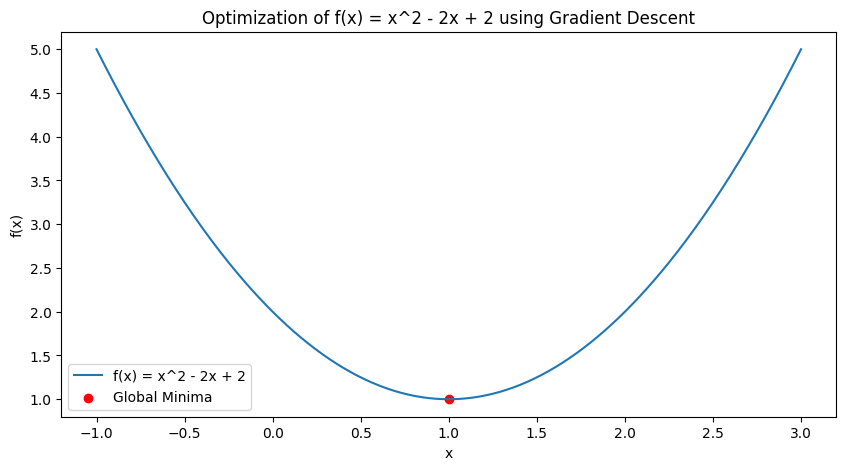

In [19]:
# Visualize f(x) = x^2 - 2x + 2
x_values = np.linspace(-1, 3, 400)
y_values = f1(x_values)
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='f(x) = x^2 - 2x + 2')
plt.scatter(result_x, f1(result_x), color='red', label='Global Minima')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Optimization of f(x) = x^2 - 2x + 2 using Gradient Descent')
plt.legend()
plt.show()

In [20]:
# Optimize f(x, y) = (1 - x)^2 + 100(y - x^2)^2
initial_x, initial_y = 0, 0  # Initial guess
learning_rate = 0.001
epsilon = 1e-9
x_min, iterations_f2 = gradient_descent(lambda x: f2(x, initial_y), lambda x: df2_x(x, initial_y), initial_x, learning_rate, epsilon)
y_min, _ = gradient_descent(lambda y: f2(x_min, y), lambda y: df2_y(x_min, y), initial_y, learning_rate, epsilon)
print("Global Minima of f(x, y) = (1 - x)^2 + 100(y - x^2)^2:", (x_min, y_min))
print("Number of iterations:", iterations_f2)

Global Minima of f(x, y) = (1 - x)^2 + 100(y - x^2)^2: (0.1612321121083628, 0.025991474682783153)
Number of iterations: 294


In [21]:
# Visualize f(x, y) = (1 - x)^2 + 100(y - x^2)^2
from mpl_toolkits.mplot3d import Axes3D
x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-1, 3, 100)
x, y = np.meshgrid(x_values, y_values)
z = f2(x, y)

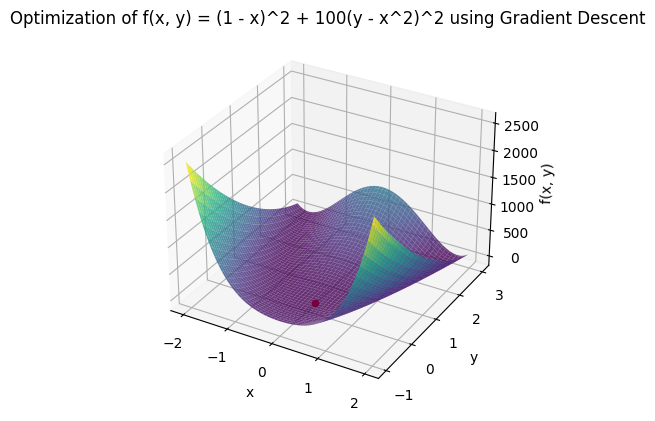

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.8)
ax.scatter(x_min, y_min, f2(x_min, y_min), color='red', label='Global Minima')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.title('Optimization of f(x, y) = (1 - x)^2 + 100(y - x^2)^2 using Gradient Descent')
plt.show()
